# Research on cat food    
Исследуемый датасет содержит информацию о кошачьих кормах. [Источник](https://www.kaggle.com/datasets/herambsawant/amazon-india-cat-food-products-dataset?select=indian_catfood_dataset.csv/).

## Считывание и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from functions import percentile, boxplot_ing, boxplot_ing_except_comp, boxplot_ing_only_comp

Считаем данные и посмотрим на них

In [2]:
data = pd.read_csv('indian_catfood_dataset.csv', index_col = 0, sep=",")    
data.head()

,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell,adult,...,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan
0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"['Dry', 'Adult', 'Mackerel']",15.750000,1304887.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.0,4.3,11737.0,"['Dry', 'Adult', 'Fish', 'Ocean']",12.557143,1473831.86,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.0,4.5,8056.0,"['Dry', 'Adult', 'Fish', 'Ocean']",27.142857,2186628.57,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Drools Adult(+1 year) Dry Cat Food, Ocean Fish...",drools,719.0,4.2,4.1,4557.0,"['Dry', 'Adult', 'Fish', 'Ocean']",17.119048,780115.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Meat Up Adult Dry Cat Food, Ocean Fish - 1.2kg...",meat,429.0,2.4,4.0,4522.0,"['Dry', 'Adult', 'Fish', 'Ocean', 'Meat']",17.875000,808307.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Проверим соответствие типов данных

In [59]:
for x in data.columns:
    print(data.loc[0, x])
    print(type(data.loc[0, x]))

purepet
<class 'str'>
189.0
<class 'numpy.float64'>
1.2
<class 'numpy.float64'>
4.2
<class 'numpy.float64'>
8285.0
<class 'numpy.float64'>
15.75
<class 'numpy.float64'>
1304887.5
<class 'numpy.float64'>
1.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
1.0
<class 'numpy.float64'>
1.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
1.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
8285.0
<class 'numpy.float64'>
15658650.0
<class 'numpy.float64'>


Исправим выброс по стоимости за 100 грамм и удалим некоторые данные, предварительно сохранив данные.

In [4]:
data2 = data #Сохраним данные без изменений
data = data.drop(['products', 'flavours'], axis=1) #Для удобства отображения датафреймов удалим столбцы 

## Анализ данных

### Опишем данные

Общие характеристики товара
<ol>
<li>products - наименование товара
<li>company - производитель
<li>price - общая стоимость за упаковку
<li>weight - вес
<li>star_rating - рейтинг товара
<li>total_comments - общее число отзывов
<li>flavours - характеристики товара, в виде списка
<li>price_per_100g - стоимость за 100 грамм
<li>per_kg_sell - кол-во проданного корма в килограммах
</ol>

тип корма:
<ol>
	<li>adult - корм для взрослых котов и кошек
	<li>wet - влажный корм
</ol>

тип упаковки:
<ol>
	<li>can - консервная банка
	<li>pouch - пакетик
</ol>


вкусовые добавки:
<ol>
	<li>chicken - курица
	<li>from_ocean - морепродукты
	<li>fish - рыба
	<li>tuna - тунец
	<li>salmon - лосось
	<li>mackerel - скумбрия
	<li>shrimps - креветки
	<li>milk - молоко
	<li>gravy -  подливка
	<li>iver - ливер
	<li>grilled - жаренное мясо
	<li>turkey - индейка
	<li>ham - ветчина
	<li>vegan - вегетерианский корм
</ol>

### Исследуем возможную взаимосвязь между from_ocean и fish, tuna, salmon, mackerel.

In [5]:
data[data["from_ocean"]==1][['from_ocean', 'fish', 'tuna', 'salmon', 'mackerel', 'shrimps']].describe()

,from_ocean,fish,tuna,salmon,mackerel,shrimps
count,108.0,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.0,0.407407,0.462963,0.212963,0.101852,0.037037
std,0.0,0.493643,0.500951,0.411310,0.303863,0.189733
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Вполне вероятно, что from_ocean — это маркер присутствия одного из пяти ингредиентов, имеющего натуральное морское происхождение. Также fish может быть маркером. Проверим их через фильтрацию.

In [6]:
data[data["fish"]==1][['from_ocean', 'fish']].describe()

,from_ocean,fish
count,44.0,44.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [7]:
data[data["tuna"]==1][['from_ocean', 'fish', 'tuna']].describe()

,from_ocean,fish,tuna
count,50.0,50.000000,50.0
mean,1.0,0.100000,1.0
std,0.0,0.303046,0.0
min,1.0,0.000000,1.0
25%,1.0,0.000000,1.0
50%,1.0,0.000000,1.0
75%,1.0,0.000000,1.0
max,1.0,1.000000,1.0


In [8]:
data[data["salmon"]==1][['from_ocean', 'fish', 'salmon']].describe()

,from_ocean,fish,salmon
count,24.000000,24.000000,24.0
mean,0.958333,0.166667,1.0
std,0.204124,0.380693,0.0
min,0.000000,0.000000,1.0
25%,1.000000,0.000000,1.0
50%,1.000000,0.000000,1.0
75%,1.000000,0.000000,1.0
max,1.000000,1.000000,1.0


In [9]:
data[data["mackerel"]==1][['from_ocean', 'fish', 'mackerel']].describe()

,from_ocean,fish,mackerel
count,11.0,11.0,11.0
mean,1.0,0.0,1.0
std,0.0,0.0,0.0
min,1.0,0.0,1.0
25%,1.0,0.0,1.0
50%,1.0,0.0,1.0
75%,1.0,0.0,1.0
max,1.0,0.0,1.0


In [10]:
data[data["shrimps"]==1][['from_ocean', 'fish', 'shrimps']].describe()

,from_ocean,fish,shrimps
count,4.0,4.00000,4.0
mean,1.0,0.50000,1.0
std,0.0,0.57735,0.0
min,1.0,0.00000,1.0
25%,1.0,0.00000,1.0
50%,1.0,0.50000,1.0
75%,1.0,1.00000,1.0
max,1.0,1.00000,1.0


По данным выше, мы подтверждаем, что from_ocean — это маркер присутствия одного из пяти ингредиентов, имеющего натуральное морское происхождение, fish не является маркером присутствия одного из четырех ингредиентов, имеющего натуральное морское происхождение. Fish — маркер присутствия в составе неуточненной рыбы.

Посмотрим общие статистики данных

In [11]:
data.describe()

,price,weight,star_rating,total_comments,price_per_100g,per_kg_sell,adult,chicken,wet,from_ocean,...,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan
count,160.00000,186.000000,160.000000,160.000000,160.000000,1.430000e+02,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1107.38750,1.982016,4.290625,924.825000,69.383844,4.696403e+05,0.639785,0.268817,0.594086,0.580645,...,0.021505,0.005376,0.123656,0.139785,0.155914,0.026882,0.005376,0.016129,0.005376,0.112903
std,1307.26405,2.262275,0.433473,2070.651007,50.642943,1.228727e+06,0.430999,0.444541,0.416572,0.494785,...,0.145453,0.073324,0.330077,0.347700,0.363753,0.162174,0.073324,0.126312,0.073324,0.317329
min,40.00000,0.005000,2.500000,1.000000,12.100000,3.266700e+02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,394.25000,0.564000,4.100000,19.000000,33.166667,1.600989e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,490.00000,1.200000,4.350000,166.000000,50.000000,7.953488e+04,1.000000,0.000000,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1404.75000,2.150000,4.500000,561.750000,90.588235,3.875717e+05,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6550.00000,14.000000,5.000000,12982.000000,250.000000,9.806518e+06,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Изучим цены на корма для котов и кошек. 
Исследуя цены за 100 грамм, мы исключаем фактор общего веса упаковки, оставляя только факторы бренда, качества и состава корма.

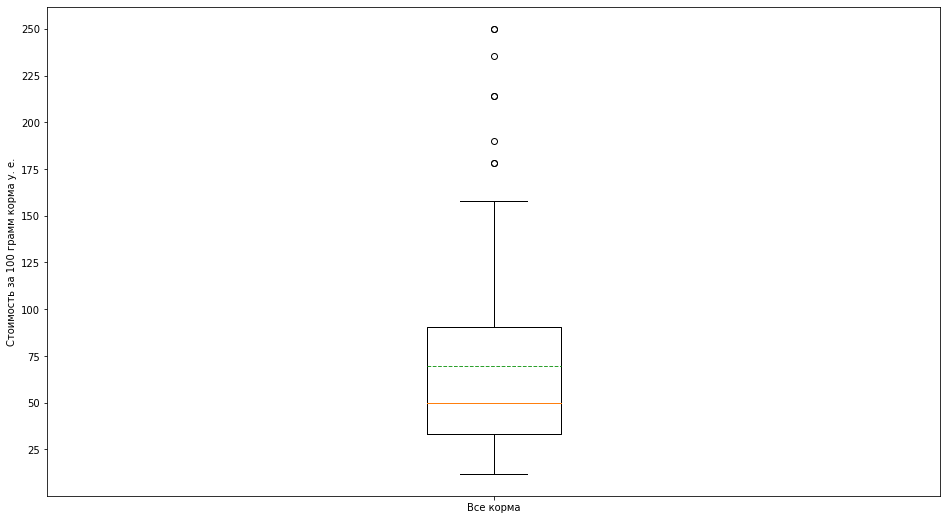

In [12]:
plt.figure(figsize=(16, 9))
plt.boxplot(data['price_per_100g'].dropna(), meanline=True, showmeans=True)
plt.xticks([1], ["Все корма"])
plt.yticks(range(25, 275, 25))
plt.ylabel("Стоимость за 100 грамм корма у. е.")
plt.show()

Здесь и далее зеленая пунктирная линия обозначает среднее значение, оранжевая линия обозначает медиану.

График цен выше показывает нам показывает нам, что большинство кормов стоит менее 200 у. е. за 100 грамм. Медиана находится на уровне 50 у. е. за 100 грамм.

### Давайте внимательнее посмотрим на вкусовые добавки в корма.

In [13]:
data[["chicken", "from_ocean", "fish", 
      "tuna", "salmon", "mackerel", 
      "shrimps", "milk", "gravy", 
      "liver", "grilled", "turkey", 
      "ham", "vegan"]].describe()

,chicken,from_ocean,fish,tuna,salmon,mackerel,shrimps,milk,gravy,liver,grilled,turkey,ham,vegan
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.268817,0.580645,0.236559,0.268817,0.129032,0.059140,0.021505,0.005376,0.139785,0.026882,0.005376,0.016129,0.005376,0.112903
std,0.444541,0.494785,0.426116,0.444541,0.336140,0.236523,0.145453,0.073324,0.347700,0.162174,0.073324,0.126312,0.073324,0.317329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Выше по строке mean мы можем увидеть, что корма в целом можно поделить на 5 групп:
1. Группа №1 — с самым популярным ингредиентом — from_ocean, это общий маркер, как мы выяснили ранее;
2. Группа №2 — chicken, fish и tuna являются самыми популярными ингредиентами, эти ингредиенты встречаются в более чем 20% кормов;
3. Группа №3 — salmon, gravy, vegan — встречаются в более чем 10% кормов;
4. Группа №4 — mackarel, shrimps, liver, turkey — встречаются хотя бы в 1% кормов;
5. Группа №5 — milk, grilled, ham — встречаются в менее чем 1% кормов.

Давайте посмотрим статистики цен сначала для кормов из 2 и 3 группы.

Добавим новый столбец: поделим прибыль за один килограмм на стоимость за килограмм и получим количество проданных упаковок.

In [14]:
data['packages_sold']=data['per_kg_sell']/data['price_per_100g']/10
data2['packages_sold']=data2['per_kg_sell']/data2['price_per_100g']/10
data.head()

,company,price,weight,star_rating,total_comments,price_per_100g,per_kg_sell,adult,chicken,wet,...,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan,packages_sold
0,purepet,189.0,1.2,4.2,8285.0,15.750000,1304887.50,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8285.000000
1,purepet,879.0,7.0,4.3,11737.0,12.557143,1473831.86,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11737.000023
2,whiskas,1900.0,7.0,4.5,8056.0,27.142857,2186628.57,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8055.999995
3,drools,719.0,4.2,4.1,4557.0,17.119048,780115.00,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4557.000000
4,meat,429.0,2.4,4.0,4522.0,17.875000,808307.50,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4522.000000


Похоже что созданный столбец совпадает с total_comments. Проверим это.

In [15]:
data["diff"] = data['packages_sold']-data['total_comments']
data[["price", "weight", "star_rating", "total_comments", "packages_sold", "diff", "price_per_100g", "per_kg_sell"]].sort_values(by="diff", ascending=False)

,price,weight,star_rating,total_comments,packages_sold,diff,price_per_100g,per_kg_sell
107,967.0,0.085,4.5,862.0,10344.000003,9482.000003,94.803922,9806517.65
69,1188.0,0.085,4.3,538.0,6456.032609,5918.032609,116.470000,7519341.18
61,269.0,0.140,3.3,789.0,2366.999996,1577.999996,64.047619,1516007.14
117,449.0,0.050,3.8,28.0,168.000000,140.000000,149.666667,251440.00
76,300.0,0.860,3.1,228.0,254.275081,26.275081,31.279070,79534.88
...,...,...,...,...,...,...,...,...
176,NaN,2.200,3.8,6.0,NaN,NaN,NaN,NaN
177,NaN,0.510,4.5,576.0,NaN,NaN,NaN,NaN
181,NaN,1.200,NaN,NaN,NaN,NaN,NaN,NaN
182,259.0,1.200,NaN,NaN,NaN,NaN,21.583333,NaN


In [16]:
data = data.drop(['diff'], axis = 1)

Как мы видим выше, есть некоторые корма, которые сильно отличаются по столбцам total_comments и packages_sold. Значит, по packages_sold будем оценивать продажи, хоть и совпадение части данных по столбцам указывает нам на потерю данных о продажах кормов, а по total_comments — на силу рейтинга кормов, так как количество комментариев показывает, сколько уникальных покупателей поделилось своим мнением и поставило рейтинг.

#### Оценим 2 и 3 группы ингридиентов

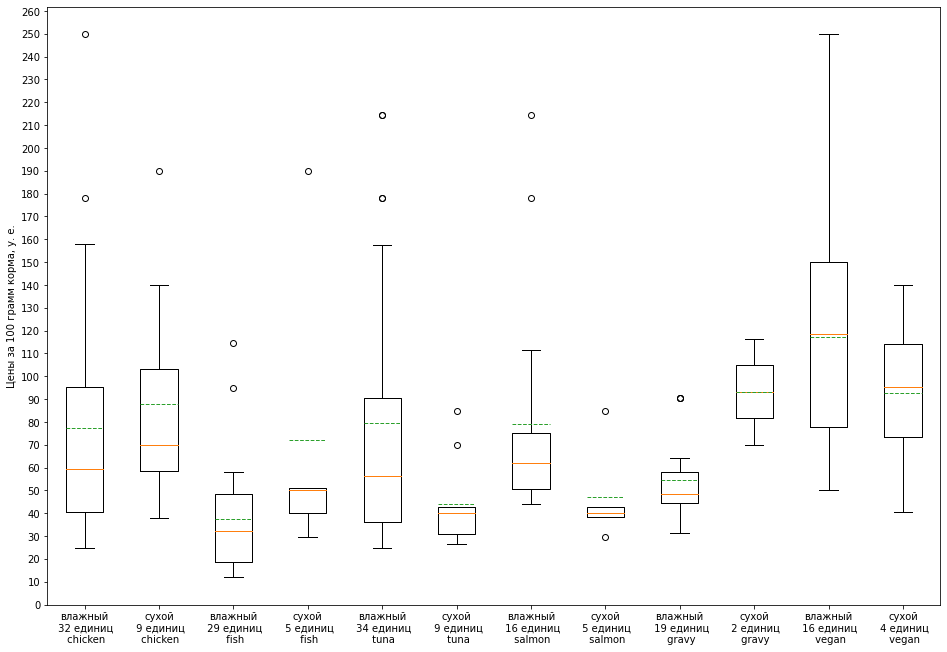

In [18]:
boxplot_ing(data, 'price_per_100g', "Цены за 100 грамм корма, у. е.", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan'])

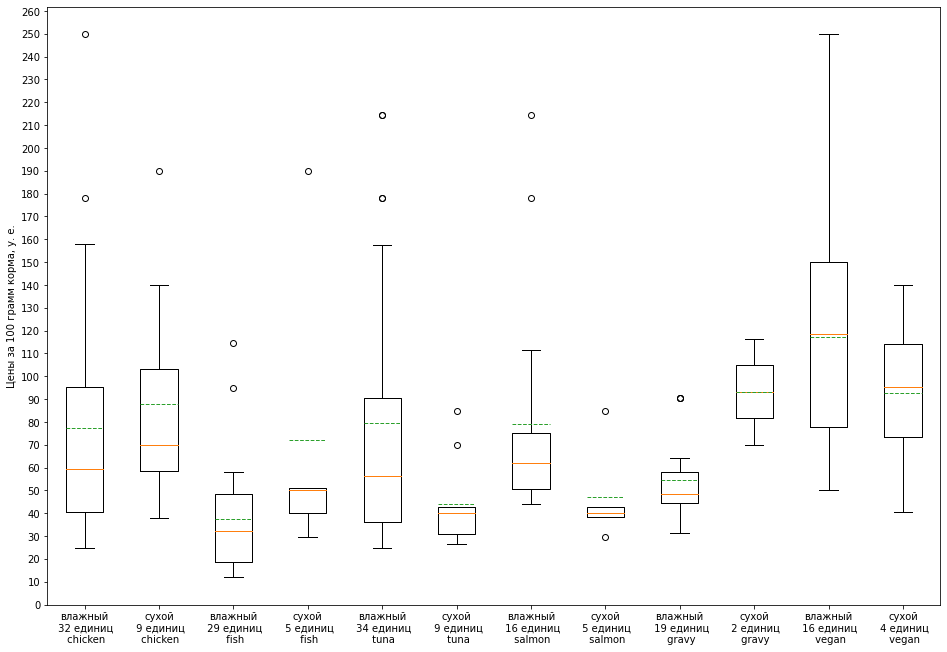

In [19]:
boxplot_ing(data, 'price_per_100g', "Цены за 100 грамм корма, у. е.", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan'])

Примечание к графику выше: корм может содержать более одного ингредиента, поэтому сумма количеств единиц, как статистика, неприменима тут.

На графике выше видно, что большинство кормов стоит менее 150 у. е. за 100 грамм, но влажный корм с vegan имеет очень большой размах стоимости. Также у всех кормов, кроме vegan и сухой gravy, есть выбросы, это видно благодаря тому, что среднее выше, чем медиана.

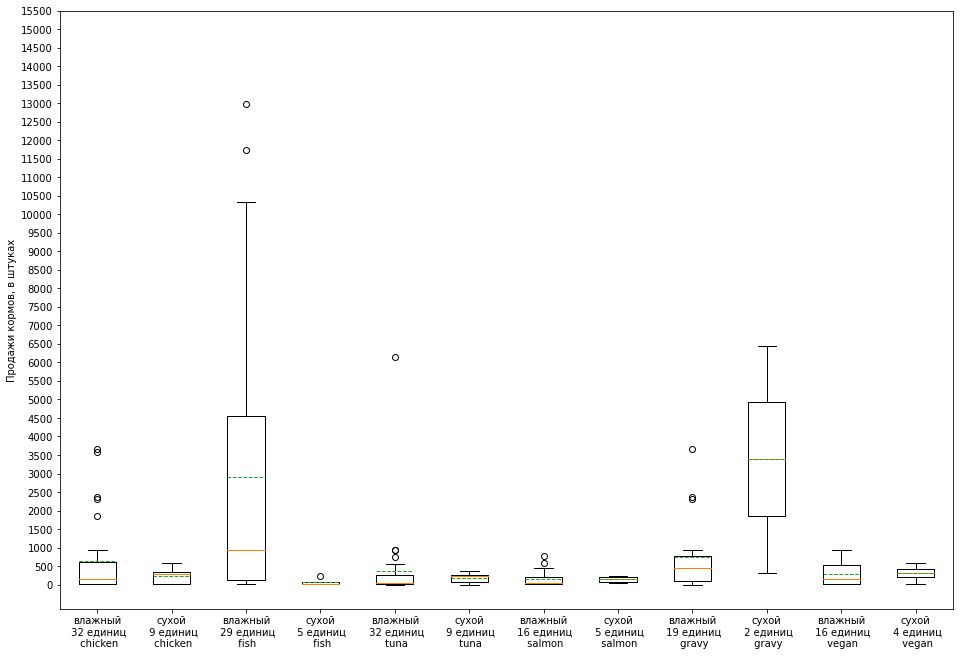

In [20]:
boxplot_ing(data, 'packages_sold', "Продажи кормов, в штуках", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan'])

На графике выше мы видим, что влажный корм с fish, сухой корм с gravy, отдельные влажные корма с gravy, с tuna и с chicken имеют самые высокие продажи.

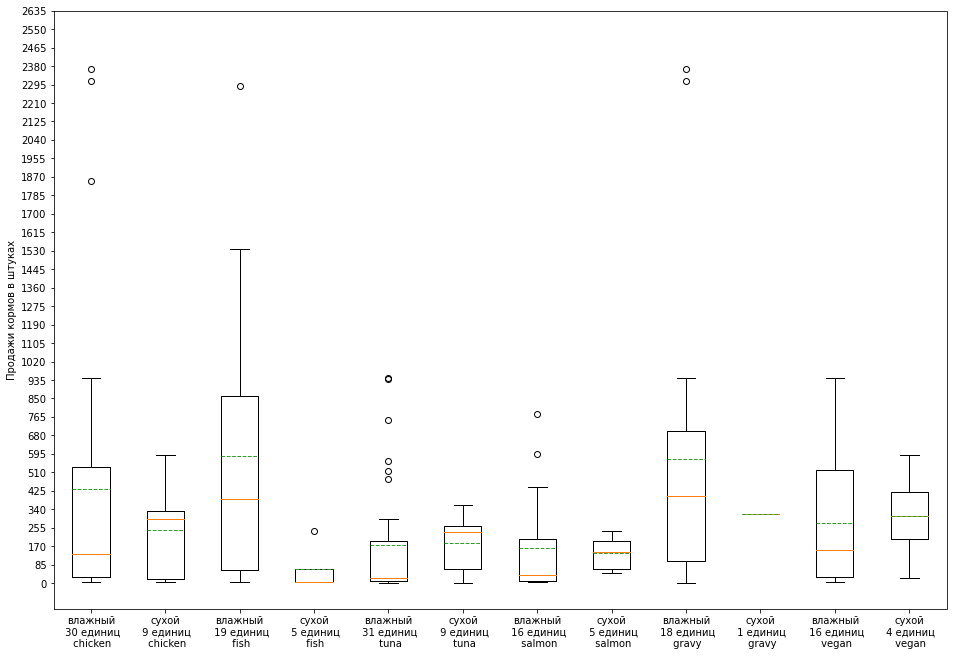

In [62]:
boxplot_ing(data, 'packages_sold', "Продажи кормов в штуках", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan'], quan=2500, filter=2500)

Тут мы видим, что хуже всех других продаются сухие корма с fish и с salmon. Посмотрим более детально на корма, которые лучше всех продаются.

In [22]:
data.sort_values(by="packages_sold", ascending=False).head(10)

,company,price,weight,star_rating,total_comments,price_per_100g,per_kg_sell,adult,chicken,wet,...,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan,packages_sold
6,whiskas,369.0,1.100,4.5,12982.0,33.545455,4354870.91,0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12982.000003
1,purepet,879.0,7.000,4.3,11737.0,12.557143,1473831.86,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11737.000023
107,royal,967.0,0.085,4.5,862.0,94.803922,9806517.65,1.0,0.0,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10344.000003
28,royal,1375.0,2.000,4.5,8411.0,68.750000,5782562.50,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8411.000000
0,purepet,189.0,1.200,4.2,8285.0,15.750000,1304887.50,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8285.000000
8,whiskas,387.0,1.200,4.5,8056.0,32.250000,2598060.00,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8056.000000
2,whiskas,1900.0,7.000,4.5,8056.0,27.142857,2186628.57,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8055.999995
69,royal,1188.0,0.085,4.3,538.0,116.470000,7519341.18,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6456.032609
7,whiskas,808.0,3.000,4.5,6133.0,26.933333,1651821.33,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6132.999988
13,meat,450.0,2.400,4.1,4847.0,18.750000,908812.50,0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4847.000000


Давайте отделим самые продающиеся корма в отдельный датафрейм для более детального рассмотрения.

In [23]:
popular=data2[data2["packages_sold"]>data2["packages_sold"].quantile(0.95)].sort_values(by="packages_sold", ascending=False)

In [24]:
pd.set_option('display.max_columns', 30)

In [25]:
popular

,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell,adult,chicken,wet,from_ocean,fish,tuna,salmon,mackerel,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan,packages_sold
6,"Whiskas Dry Food for Kittens (2-12 Months), Oc...",whiskas,369.0,1.100,4.5,12982.0,"['Dry', 'Fish', 'Ocean', 'Kitten']",33.545455,4354870.91,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12982.000003
1,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.000,4.3,11737.0,"['Dry', 'Adult', 'Fish', 'Ocean']",12.557143,1473831.86,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11737.000023
107,"Royal Canin Adult Instinctive Wet Cat Food, Fi...",royal,967.0,0.085,4.5,862.0,"['Adult', 'Fish', 'Wet', 'Canin']",94.803922,9806517.65,1.0,0.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10344.000003
28,"Royal Canin Fit 32, 2 kg",royal,1375.0,2.000,4.5,8411.0,['Canin'],68.750000,5782562.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8411.000000
0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.200,4.2,8285.0,"['Dry', 'Adult', 'Mackerel']",15.750000,1304887.50,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8285.000000
8,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,387.0,1.200,4.5,8056.0,"['Dry', 'Adult', 'Fish', 'Ocean']",32.250000,2598060.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8056.000000
2,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.000,4.5,8056.0,"['Dry', 'Adult', 'Fish', 'Ocean']",27.142857,2186628.57,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8055.999995
69,Royal Canin Intense Beauty Gravy Adult Cat Sea...,royal,1188.0,0.085,4.3,538.0,"['Adult', 'Gravy', 'Sea', 'Canin']",116.470000,7519341.18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6456.032609


In [26]:
popular[popular["weight"]>0.2]["products"].values

array(['Whiskas Dry Food for Kittens (2-12 Months), Ocean Fish Flavour, 1.1kg Pack',
       'Purepet Adult(+1 Year) Dry Cat Food, Ocean Fish - 7kg',
       'Royal Canin Fit 32, 2 kg',
       'Purepet Mackerel Adult Dry Cat Food, 1.2 kg',
       'Whiskas Dry Food for Adult Cats (+1 Years), Ocean Fish Flavour, 1.2kg Pack',
       'Whiskas Dry Food for Adult Cats (+1 Years), Ocean Fish Flavour, 7kg Pack'],
      dtype=object)

Как видно выше, пятерка самых продаваемых кормов — это влажные корма. Крайне высокие продажи этих кормов можно объяснить двумя моментами:
1. Ветеринары рекомендуют давать влажный корм, в том числе и в консервах, как дополнительный источник влаги в организме котов и кошек;
2. Одна упаковка весит очень мало, однако в некоторых случаях невозможно давать питомцу сухой корм по медицинским показаниям, вследствие этого повышается потребность во влажном корме.

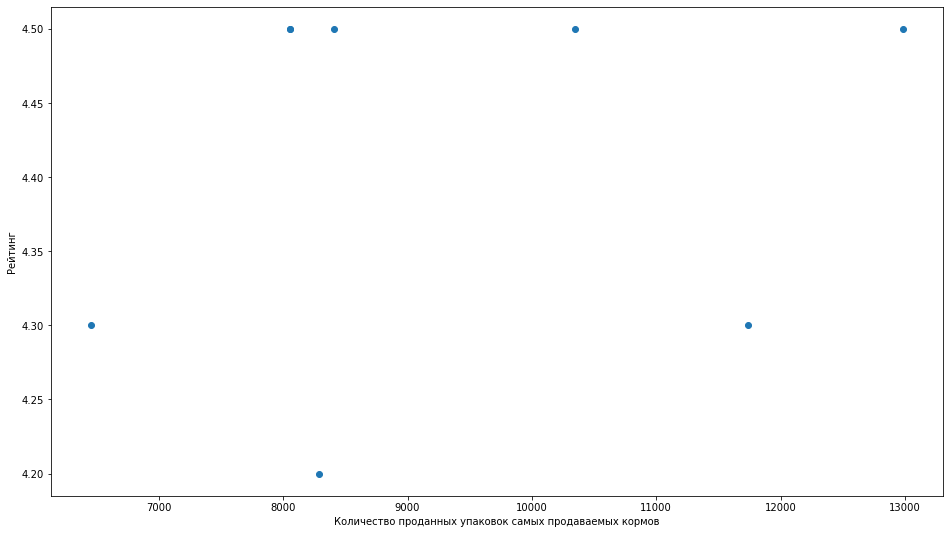

In [27]:
plt.figure(figsize=(16, 9))
plt.scatter(popular['packages_sold'], popular['star_rating'])
plt.xlabel("Количество проданных упаковок самых продаваемых кормов")
plt.ylabel("Рейтинг")
plt.show()

Как видно на графике, большинство самых покупаемых кормов имеет рейтинг 4.5.

#### Оценим 4 и 5 группы

In [28]:
data[(data['mackerel'] == 1.0)| (data['shrimps'] == 1.0) | (data['liver'] == 1.0) | (data['turkey'] == 1.0) | (data['milk'] == 1.0) | (data['grilled'] == 1.0) | (data['ham'] == 1.0)][['star_rating', 'packages_sold', 'price_per_100g', 'total_comments', 'wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']].dropna().groupby(
    ['wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']).agg(
{'price_per_100g':['count', 'min', percentile(0.25), 'mean', percentile(0.5), percentile(0.75), percentile(0.95), 'max']})

price_per_100g              \
                                                            count         min   
wet mackerel shrimps liver turkey milk grilled ham                              
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0              1   40.545455   
                           1.0    0.0  0.0     0.0              1   58.500000   
             1.0     0.0   0.0    0.0  0.0     0.0              2   29.692308   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0              4   32.666667   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0              1  158.000000   
                     1.0   0.0    0.0  0.0     0.0              4   31.428571   
             1.0     0.0   0.0    0.0  0.0     0.0              2   90.588235   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0              1   31.750000   
                           1.0    0.0  0.0     0.0              1   74.375000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0              3   15.750000   

                                                                              \
                                                   percentile_25        mean   
wet mackerel shrimps liver turkey milk grilled ham                             
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0     40.545455   40.545455   
                           1.0    0.0  0.0     0.0     58.500000   58.500000   
             1.0     0.0   0.0    0.0  0.0     0.0     32.291958   34.891608   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     38.166667   40.827652   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0    158.000000  158.000000   
                     1.0   0.0    0.0  0.0     0.0     31.428571   40.654762   
             1.0     0.0   0.0    0.0  0.0     0.0    112.441176  134.294118   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0     31.750000   31.750000   
                           1.0    0.0  0.0     0.0     74.375000   74.375000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     21.925000   26.646970   

                                                                  \
                                                   percentile_50   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0     40.545455   
                           1.0    0.0  0.0     0.0     58.500000   
             1.0     0.0   0.0    0.0  0.0     0.0     34.891608   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     41.363636   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0    158.000000   
                     1.0   0.0    0.0  0.0     0.0     33.571429   
             1.0     0.0   0.0    0.0  0.0     0.0    134.294118   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0     31.750000   
                           1.0    0.0  0.0     0.0     74.375000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     28.100000   

                                                                  \
                                                   percentile_75   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0     40.545455   
                           1.0    0.0  0.0     0.0     58.500000   
             1.0     0.0   0.0    0.0  0.0     0.0     37.491259   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     44.024621   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0    158.000000   
                     1.0   0.0    0.0  0.0     0.0     42.797619   
             1.0     0.0   0.0    0.0  0.0     0.0    156.147059   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0     31.750000   
                           1.0    0.0  0.0     0.0     74.375000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     32.095455   

                                                                              
                                                   percentile_95         max  
wet mackerel shrimps liver t

In [29]:
data[(data['mackerel'] == 1.0)| (data['shrimps'] == 1.0) | (data['liver'] == 1.0) | (data['turkey'] == 1.0) | (data['milk'] == 1.0) | (data['grilled'] == 1.0) | (data['ham'] == 1.0)][['star_rating', 'packages_sold', 'price_per_100g', 'total_comments', 'wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']].dropna().groupby(
    ['wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']).agg(
{'star_rating':['count', 'min', percentile(0.25), 'mean', percentile(0.5), percentile(0.75), percentile(0.95), 'max']})

star_rating       \
                                                         count  min   
wet mackerel shrimps liver turkey milk grilled ham                    
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0           1  4.2   
                           1.0    0.0  0.0     0.0           1  5.0   
             1.0     0.0   0.0    0.0  0.0     0.0           2  4.1   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0           4  2.5   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0           1  5.0   
                     1.0   0.0    0.0  0.0     0.0           4  3.3   
             1.0     0.0   0.0    0.0  0.0     0.0           2  4.1   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0           1  4.5   
                           1.0    0.0  0.0     0.0           1  3.6   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0           3  4.2   

                                                                            \
                                                   percentile_25      mean   
wet mackerel shrimps liver turkey milk grilled ham                           
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0         4.200  4.200000   
                           1.0    0.0  0.0     0.0         5.000  5.000000   
             1.0     0.0   0.0    0.0  0.0     0.0         4.125  4.150000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0         3.700  3.950000   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0         5.000  5.000000   
                     1.0   0.0    0.0  0.0     0.0         3.375  3.425000   
             1.0     0.0   0.0    0.0  0.0     0.0         4.125  4.150000   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0         4.500  4.500000   
                           1.0    0.0  0.0     0.0         3.600  3.600000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0         4.350  4.433333   

                                                                  \
                                                   percentile_50   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0          4.20   
                           1.0    0.0  0.0     0.0          5.00   
             1.0     0.0   0.0    0.0  0.0     0.0          4.15   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0          4.15   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0          5.00   
                     1.0   0.0    0.0  0.0     0.0          3.45   
             1.0     0.0   0.0    0.0  0.0     0.0          4.15   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0          4.50   
                           1.0    0.0  0.0     0.0          3.60   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0          4.50   

                                                                  \
                                                   percentile_75   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0         4.200   
                           1.0    0.0  0.0     0.0         5.000   
             1.0     0.0   0.0    0.0  0.0     0.0         4.175   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0         4.400   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0         5.000   
                     1.0   0.0    0.0  0.0     0.0         3.500   
             1.0     0.0   0.0    0.0  0.0     0.0         4.175   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0         4.500   
                           1.0    0.0  0.0     0.0         3.600   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0         4.550   

                                                                       
                                                   percentile_95  max  
wet mackerel shrimps liver turkey milk grilled ham                     
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0         4.200  4.2  
                           1.0    0.0  0.0     0.0    

In [30]:
data[(data['mackerel'] == 1.0)| (data['shrimps'] == 1.0) | (data['liver'] == 1.0) | (data['turkey'] == 1.0) | (data['milk'] == 1.0) | (data['grilled'] == 1.0) | (data['ham'] == 1.0)][['star_rating', 'packages_sold', 'price_per_100g', 'total_comments', 'wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']].dropna().groupby(
    ['wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']).agg(
{'packages_sold':['count', 'min', percentile(0.25), 'mean', percentile(0.5), percentile(0.75), percentile(0.95), 'max']})

packages_sold               \
                                                           count          min   
wet mackerel shrimps liver turkey milk grilled ham                              
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0             1   360.000009   
                           1.0    0.0  0.0     0.0             1     3.000000   
             1.0     0.0   0.0    0.0  0.0     0.0             2    65.000000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0             4     1.000010   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0             1     4.000000   
                     1.0   0.0    0.0  0.0     0.0             4   327.999986   
             1.0     0.0   0.0    0.0  0.0     0.0             2    19.000000   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0             1    23.000000   
                           1.0    0.0  0.0     0.0             1     6.000000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0             3  2791.999995   

                                                                               \
                                                   percentile_25         mean   
wet mackerel shrimps liver turkey milk grilled ham                              
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0    360.000009   360.000009   
                           1.0    0.0  0.0     0.0      3.000000     3.000000   
             1.0     0.0   0.0    0.0  0.0     0.0    109.250000   153.500000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0      1.750003    48.750001   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0      4.000000     4.000000   
                     1.0   0.0    0.0  0.0     0.0    501.999997  1000.999995   
             1.0     0.0   0.0    0.0  0.0     0.0     20.250001    21.500002   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0     23.000000    23.000000   
                           1.0    0.0  0.0     0.0      6.000000     6.000000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0   3495.999997  5092.333332   

                                                                  \
                                                   percentile_50   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0    360.000009   
                           1.0    0.0  0.0     0.0      3.000000   
             1.0     0.0   0.0    0.0  0.0     0.0    153.500000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     25.000000   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0      4.000000   
                     1.0   0.0    0.0  0.0     0.0    654.500000   
             1.0     0.0   0.0    0.0  0.0     0.0     21.500002   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0     23.000000   
                           1.0    0.0  0.0     0.0      6.000000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0   4200.000000   

                                                                  \
                                                   percentile_75   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0    360.000009   
                           1.0    0.0  0.0     0.0      3.000000   
             1.0     0.0   0.0    0.0  0.0     0.0    197.750000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0     71.999998   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0      4.000000   
                     1.0   0.0    0.0  0.0     0.0   1153.499999   
             1.0     0.0   0.0    0.0  0.0     0.0     22.750003   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0     23.000000   
                           1.0    0.0  0.0     0.0      6.000000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0   6242.500000   

                                                                               
                                                   percentile_95          max  
wet mackerel 

In [31]:
data[(data['mackerel'] == 1.0)| (data['shrimps'] == 1.0) | (data['liver'] == 1.0) | (data['turkey'] == 1.0) | (data['milk'] == 1.0) | (data['grilled'] == 1.0) | (data['ham'] == 1.0)][['star_rating', 'packages_sold', 'price_per_100g', 'total_comments', 'wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']].dropna().groupby(
    ['wet', 'mackerel', 'shrimps', 'liver', 'turkey', 'milk', 'grilled', 'ham']).agg(
{'total_comments':['count', 'min', percentile(0.25), 'mean', percentile(0.5), percentile(0.75), percentile(0.95), 'max']})

total_comments          \
                                                            count     min   
wet mackerel shrimps liver turkey milk grilled ham                          
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0              1   360.0   
                           1.0    0.0  0.0     0.0              1     3.0   
             1.0     0.0   0.0    0.0  0.0     0.0              2    65.0   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0              4     1.0   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0              1     4.0   
                     1.0   0.0    0.0  0.0     0.0              4   328.0   
             1.0     0.0   0.0    0.0  0.0     0.0              2    19.0   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0              1    23.0   
                           1.0    0.0  0.0     0.0              1     6.0   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0              3  2792.0   

                                                                               \
                                                   percentile_25         mean   
wet mackerel shrimps liver turkey milk grilled ham                              
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0        360.00   360.000000   
                           1.0    0.0  0.0     0.0          3.00     3.000000   
             1.0     0.0   0.0    0.0  0.0     0.0        109.25   153.500000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0          1.75    48.750000   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0          4.00     4.000000   
                     1.0   0.0    0.0  0.0     0.0        502.00   606.500000   
             1.0     0.0   0.0    0.0  0.0     0.0         19.25    19.500000   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0         23.00    23.000000   
                           1.0    0.0  0.0     0.0          6.00     6.000000   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0       3496.00  5092.333333   

                                                                  \
                                                   percentile_50   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0         360.0   
                           1.0    0.0  0.0     0.0           3.0   
             1.0     0.0   0.0    0.0  0.0     0.0         153.5   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0          25.0   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0           4.0   
                     1.0   0.0    0.0  0.0     0.0         654.5   
             1.0     0.0   0.0    0.0  0.0     0.0          19.5   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0          23.0   
                           1.0    0.0  0.0     0.0           6.0   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0        4200.0   

                                                                  \
                                                   percentile_75   
wet mackerel shrimps liver turkey milk grilled ham                 
0.0 0.0      0.0     0.0   0.0    1.0  0.0     0.0        360.00   
                           1.0    0.0  0.0     0.0          3.00   
             1.0     0.0   0.0    0.0  0.0     0.0        197.75   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0         72.00   
0.5 0.0      0.0     0.0   0.0    0.0  0.0     1.0          4.00   
                     1.0   0.0    0.0  0.0     0.0        759.00   
             1.0     0.0   0.0    0.0  0.0     0.0         19.75   
1.0 0.0      0.0     0.0   0.0    0.0  1.0     0.0         23.00   
                           1.0    0.0  0.0     0.0          6.00   
    1.0      0.0     0.0   0.0    0.0  0.0     0.0       6242.50   

                                                                          
                                                   percentile_95     max  
wet mackerel shrimps liver turkey milk grilled ham                        


Примечание к таблицам выше: wet 0.5 и wet 1.0 — влажные корма.

- Самыми низкооценёнными кормами являются влажные со вкусом liver — максимальная оценка 3,5, однако эти корма обладают хорошими продажами — 2367 упаковок в сумме и 502 упаковки минимально для одного корма, вероятно, это благодаря достаточно низкой стоимости за 100 грамм.
- Также есть влажный корм со вкусом turkey, с чуть более лучшей оценкой — 3,6 и более высокой ценой за 100 грамм, но этот корм не продается хорошо. Возможно, этот корм только появился на рынке.
- Самые продаваемые корма — влажные корма со вкусом mackerel, обладают хорошим рейтингом — медиана рейтинга 4.5.

### Оценим компании, производящие корма, по их продуктам.

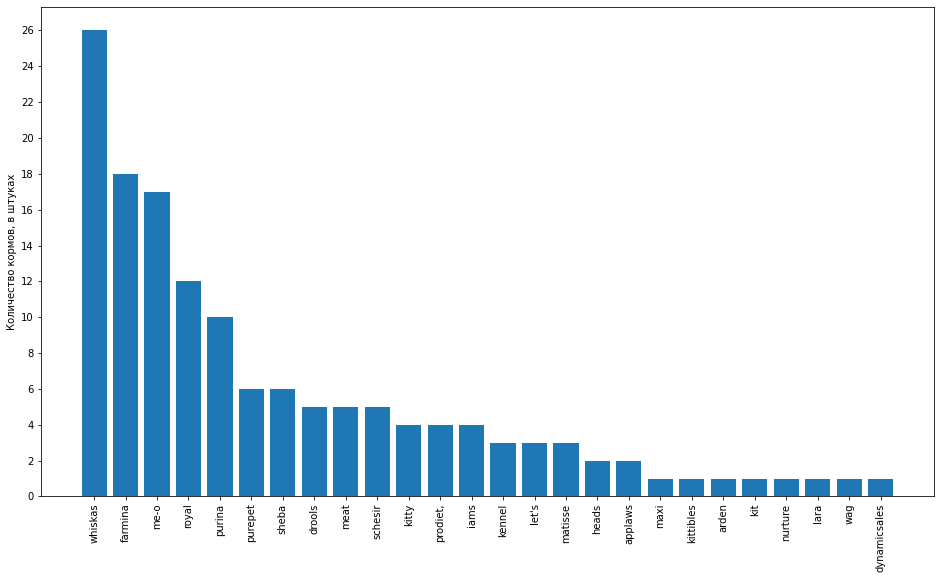

In [66]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation = 90)
plt.yticks(range(0, 50, 2))
plt.ylabel("Количество кормов, в штуках")
plt.bar(data.dropna()['company'].value_counts().index, data.dropna()['company'].value_counts().values)
plt.show()

In [64]:
data.dropna()['company'].value_counts()

whiskas         26
farmina         18
me-o            17
royal           12
purina          10
purepet          6
sheba            6
drools           5
meat             5
schesir          5
kitty            4
prodiet,         4
iams             4
kennel           3
let's            3
matisse          3
heads            2
applaws          2
maxi             1
kittibles        1
arden            1
kit              1
nurture          1
lara             1
wag              1
dynamicsales     1
Name: company, dtype: int64

Как видно выше, среди компаний есть большой разброс по количеству кормов. Следовательно, чтобы сравнивать между собой примерно равные по количествам кормов компании, необходимо их разбить на 5 групп. Для каждой группы произведем сравнительные исследования стоимости кормов, какие ингредиенты используются, какой рейтинг у кормов, сколько упаковок корма было продано, какую выручку производители получили за продажи кормов.
- Группа №1: Whiskas.
- Группа №2: Me-o и Farmina.
- Группа №3: Purina и Royal
- Группа №4: Meat, Purepet, Sheba, Schesir, Drools.
- Группа №5: Все остальные. Группа №5 не будет широко исследоваться, потому как мало данных кормов по каждой компании в этой группе.

Создадим новый столбец - выручка.

In [37]:
data["revenue"] = data["price"] * 10 * data["packages_sold"]
data["revenue"]

0       15658650.0
1      103168230.2
2      153063999.9
3       32764830.0
4       19399380.0
          ...     
181            NaN
182            NaN
183        71400.0
184            NaN
185       380000.0
Name: revenue, Length: 186, dtype: float64

#### Исследуем группу компаний №1 

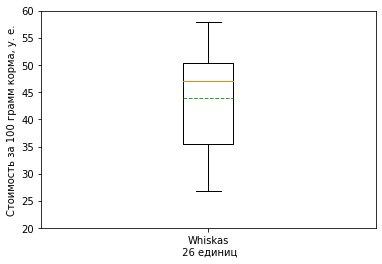

In [38]:
plt.boxplot(data[data["company"]=='whiskas']['price_per_100g'].dropna(), meanline=True, showmeans=True)
plt.xticks([1], [f"Whiskas\n {data[data['company']=='whiskas'].dropna().shape[0]} единиц"])
plt.yticks(range(20, 65, 5))
plt.ylabel("Стоимость за 100 грамм корма, у. е.")
plt.show()

Как мы видим выше, у производителя Whiskas нет выбросов по стоимости за 100 грамм, а средняя цена находится на уровне 47 у. е., и притом у Whiskas наибольшее число кормов. Это может означать, что без этого производителя график цен по ингредиентам будет значительно изменен. Проверим это ниже.

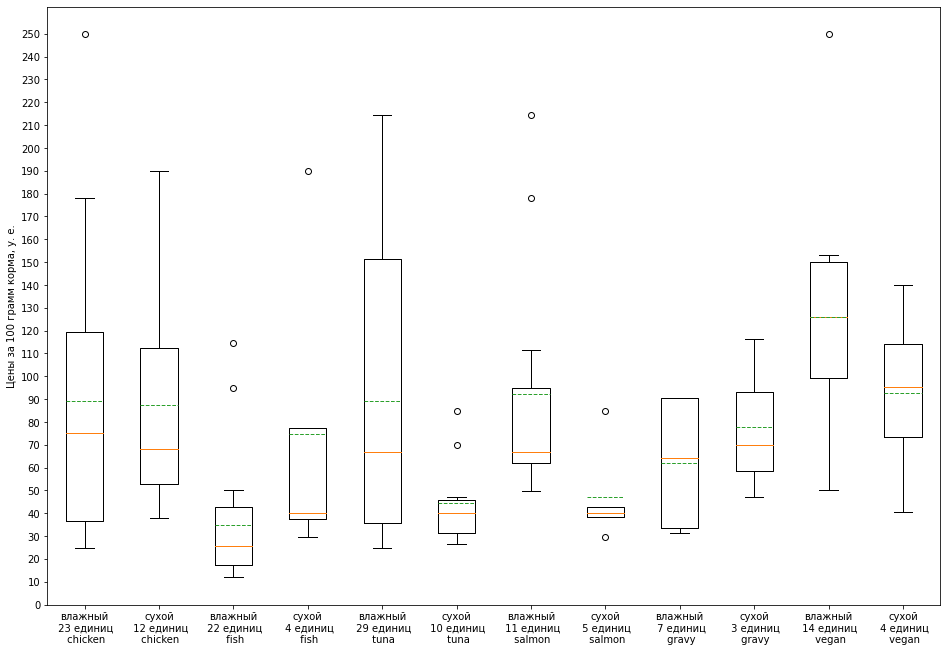

In [39]:
boxplot_ing_except_comp(data, 'price_per_100g', "Цены за 100 грамм корма, у. е.", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan'], 'whiskas')

Если сравнивать графики, то становятся видны некоторые различия.
1. У ингредиентов gravy, tuna и chicken заметно увеличился третий квартиль, что подтверждает нашу гипотезу выше только относительно этих ингредиентов.
2. У ингредиента salmon незначительно увеличился третий квартиль.
3. У ингредиентов fish и mackerel незначительно понизились все квартили.

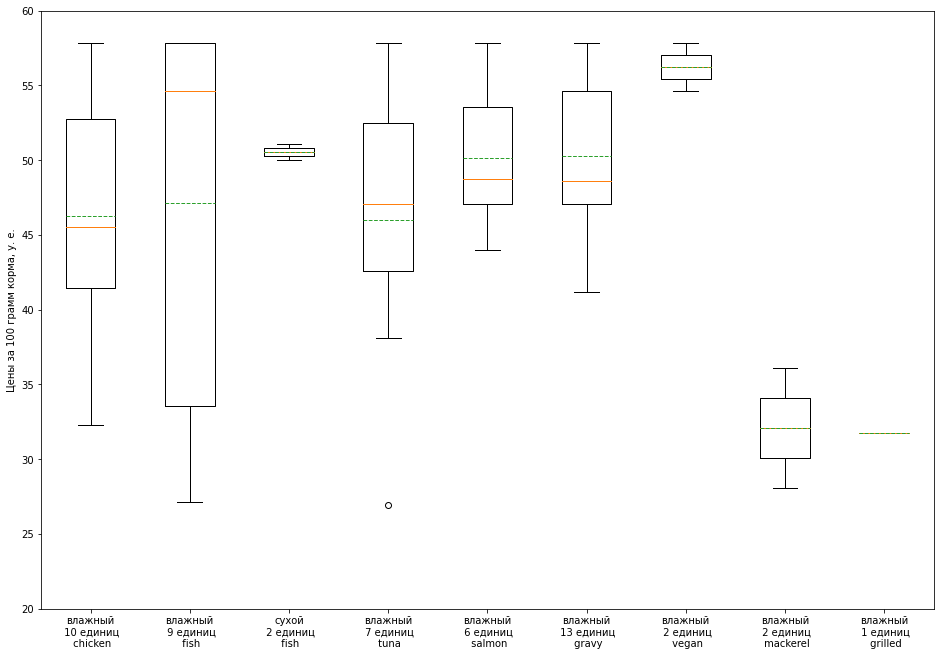

In [40]:
boxplot_ing_only_comp(data, 'price_per_100g', "Цены за 100 грамм корма, у. е.", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan', 'mackerel', 'grilled'], 'whiskas')

Как мы видим выше, Whiskas производит корма по достаточно низким ценам с большим вкусовым разнообразием. При этом в целом самыми дешевыми получаются корма с mackerel и с grilled. Хоть у fish и tuna есть корма с такими же ценами за 100 грамм, как и mackerel с grilled, но их очень мало, что видно из уровня медианы.

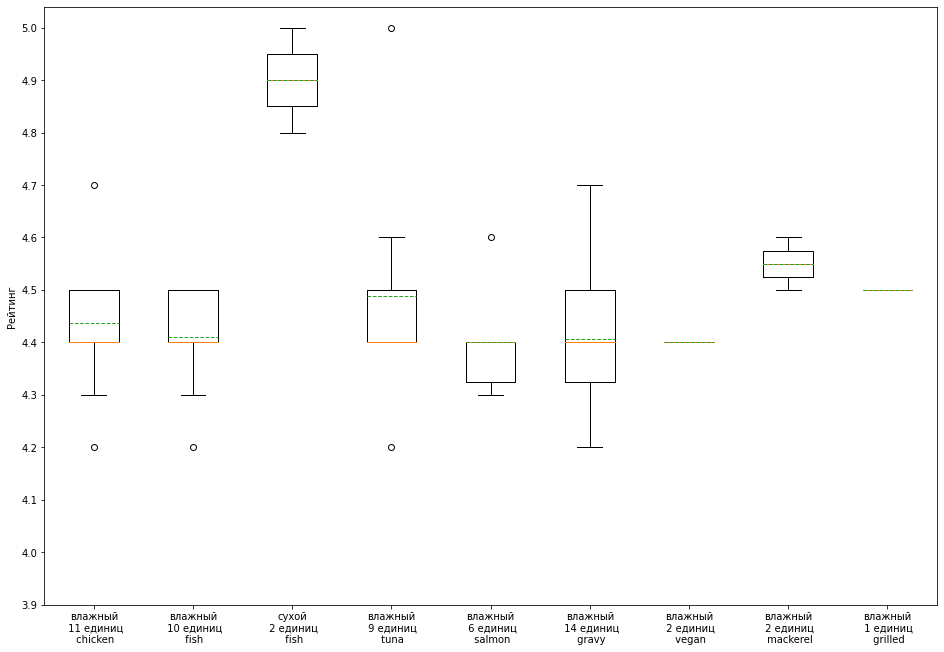

In [41]:
boxplot_ing_only_comp(data, 'star_rating', "Рейтинг", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan', 'mackerel', 'grilled'], 'whiskas', step=0.1, minx=4)

Корма Whiskas получают весьма хорошие оценки, минимальная оценка — 4.2.

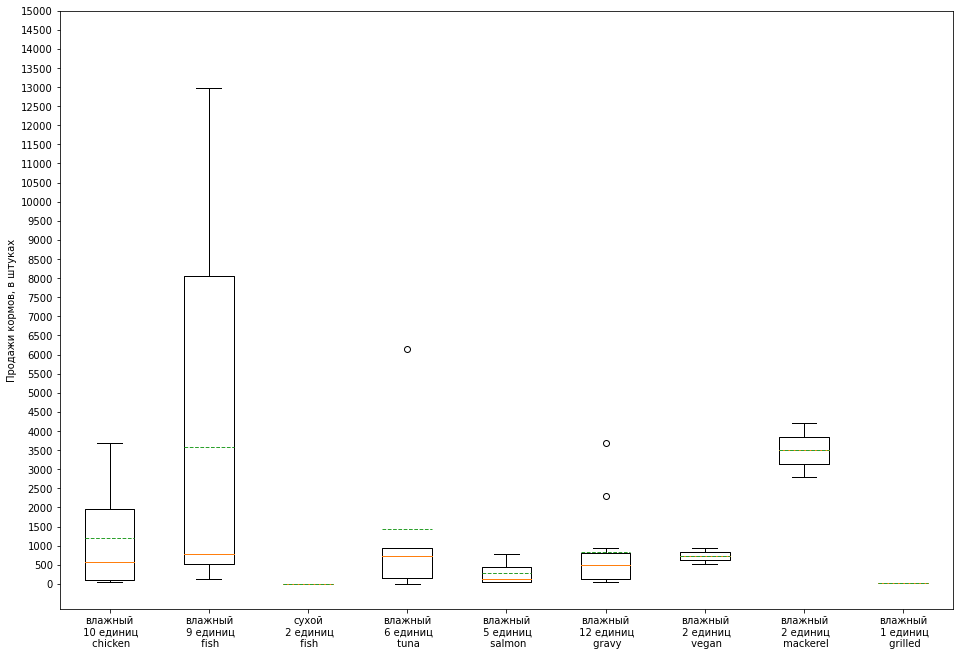

In [42]:
boxplot_ing_only_comp(data, 'packages_sold', "Продажи кормов, в штуках", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan', 'mackerel', 'grilled'], 'whiskas')

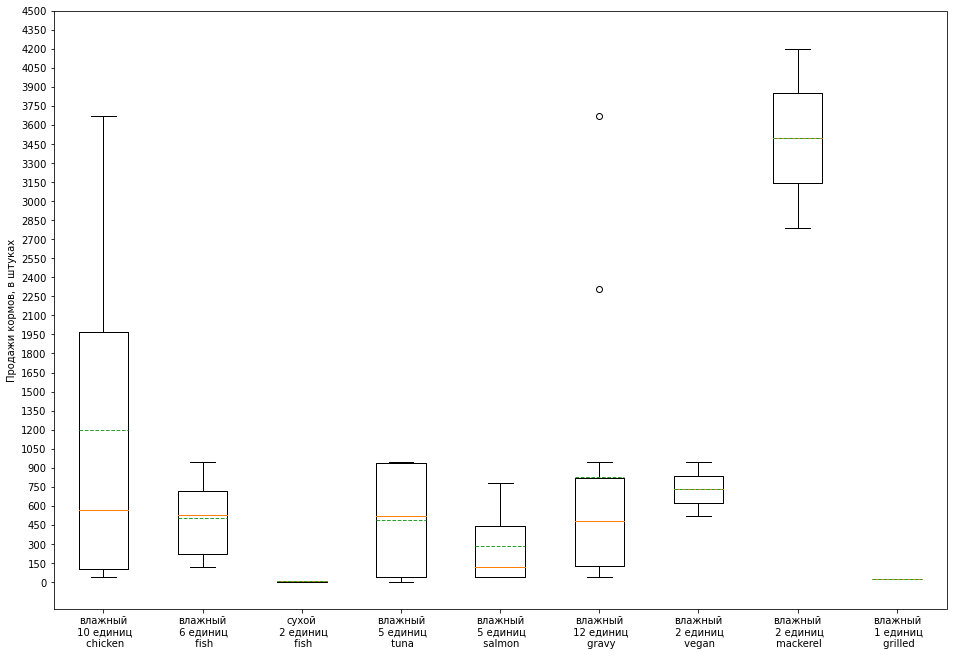

In [43]:
boxplot_ing_only_comp(data, 'packages_sold', "Продажи кормов, в штуках", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan', 'mackerel', 'grilled'], 'whiskas', quan=4500, filter=4500)

На данном графике мы можем видеть, что:
1. покупателям Whiskas нравятся вкусы: chicken, tuna, salmon и vegan;
2. покупатели не готовы брать корма mackerel.

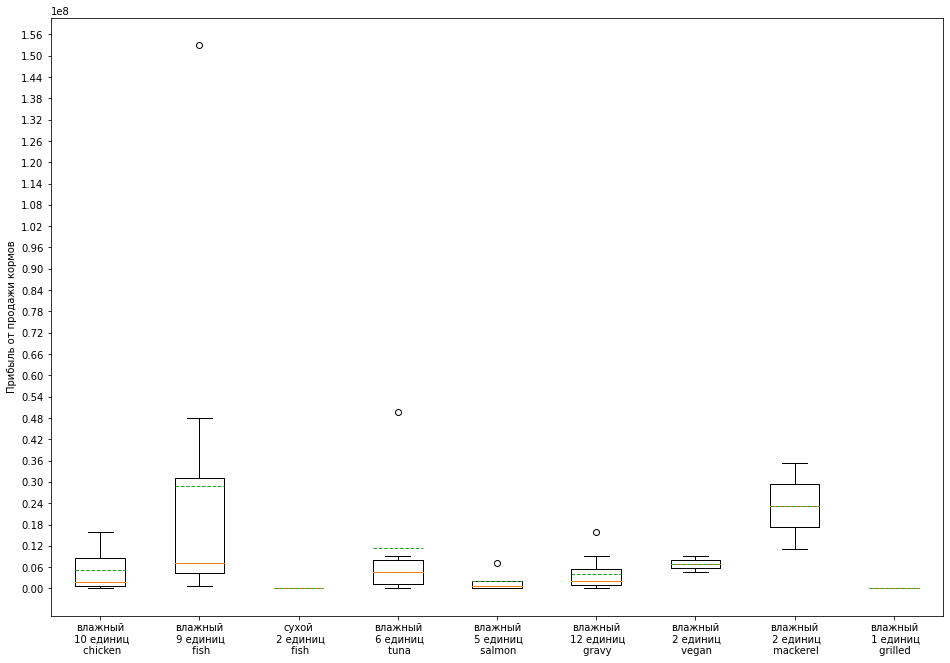

In [44]:
boxplot_ing_only_comp(data, 'revenue', "Прибыль от продажи кормов", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan', 'mackerel', 'grilled'], 'whiskas')

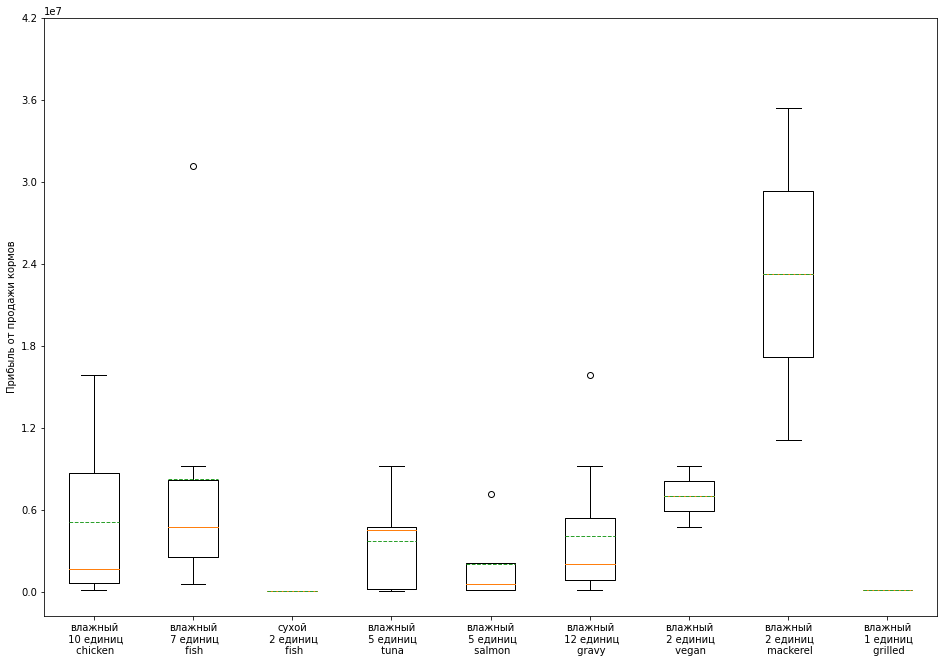

In [45]:
boxplot_ing_only_comp(data, 'revenue', "Прибыль от продажи кормов", ['chicken', 'fish', 'tuna', 'salmon', 'gravy', 'vegan', 'mackerel', 'grilled'], 'whiskas', filter=40000000, quan=40000000)

- Примечания к выводу результатов и графику выше: расчеты прибыльности велись только с учетом указанной цены, однако производитель или продавец могут делать скидки за оптовые закупки; каждый из кормов может содержать несколько ингредиентов.
- Как видно выше, у кормов Whiskas достаточно высокая доходность, кроме кормов сухой Fish и влажный Grilled, вполне возможно, что эти два вида корма только недавно появились на данной площадке.

Выводы по группе № 1:
- корма Whiskas являются достаточно дешевыми и получают высокие рейтинги от покупателей;
- производитель Whiskas оказывает большое влияние на общую картину цен;
- покупателям нравятся корма с ингредиентами: chicken, tuna, salmon и vegan;
- самыми прибыльными являются влажный корм с fish, влажный корм с mackerel и влажный корм с chicken.

#### Исследуем группу компаний № 2

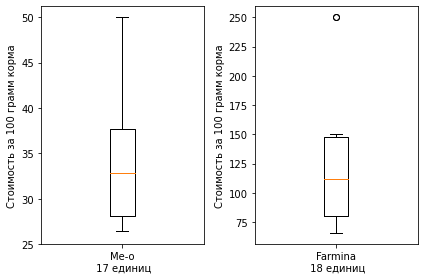

In [46]:
plt.figure(1)
plt.subplot(121)
plt.boxplot(data[data["company"] == 'me-o']['price_per_100g'].dropna())
plt.xticks([1], [f"Me-o\n {data[data['company']=='me-o'].dropna().shape[0]} единиц"])
plt.yticks(range(25, 55, 5))
plt.ylabel("Стоимость за 100 грамм корма")
plt.subplot(122)
plt.boxplot(data[data["company"] == 'farmina']['price_per_100g'].dropna())
plt.xticks([1], [f"Farmina\n {data[data['company']=='farmina'].dropna().shape[0]} единиц"])
plt.ylabel("Стоимость за 100 грамм корма")
plt.tight_layout()
plt.show()

Вполне понятно, что стоимости статистически значимо различаются. Подтвердим это тестами.

In [47]:
print(scipy.stats.shapiro(data[data["company"] == 'me-o']['price_per_100g']))
print(scipy.stats.shapiro(data[data["company"] == 'farmina']['price_per_100g']))

ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.8443695306777954, pvalue=0.006911684758961201)


Выборки не принадлежат нормальному распределению.

In [48]:
print(scipy.stats.mannwhitneyu(data[data["company"] == 'me-o']['price_per_100g'].dropna(), data[data["company"] == 'farmina']['price_per_100g'].dropna()))
print(scipy.stats.f_oneway(data[data["company"] == 'me-o']['price_per_100g'].dropna(), data[data["company"] == 'farmina']['price_per_100g'].dropna()))

MannwhitneyuResult(statistic=0.0, pvalue=3.0954063407718733e-07)
F_onewayResult(statistic=46.44717777614615, pvalue=7.67887258612633e-08)


Тесты, а именно критерий Манна-Уитни и однофакторный дисперсионный анализ, подтверждают, что стоимости за 100 грамм корма у компаний Me-o и Farmina значимо отличаются.

Посмотрим, какие ингредиенты используют Me-o и Farmina.

In [49]:
data[data["company"]=="me-o"][["chicken", "fish", 
      "tuna", "salmon", "mackerel", 
      "shrimps", "milk", "gravy", 
      "liver", "grilled", "turkey", 
      "ham", "vegan"]].describe()

,chicken,fish,tuna,salmon,mackerel,shrimps,milk,gravy,liver,grilled,turkey,ham,vegan
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
mean,0.130435,0.130435,0.304348,0.043478,0.130435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.344350,0.344350,0.470472,0.208514,0.344350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Me-o использует ингредиенты: chicken - 3 корма, fish - 3 корма, tuna - 7 кормов, mackerel - 3 корма.

In [50]:
data[data["company"]=="farmina"][["chicken", "fish", 
      "tuna", "salmon", "mackerel", 
      "shrimps", "milk", "gravy", 
      "liver", "grilled", "turkey", 
      "ham", "vegan"]].describe()

,chicken,fish,tuna,salmon,mackerel,shrimps,milk,gravy,liver,grilled,turkey,ham,vegan
count,18.000000,18.0,18.000000,18.000000,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.000000
mean,0.333333,0.0,0.111111,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722222
std,0.485071,0.0,0.323381,0.383482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.460889
min,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
50%,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


Farmina использует ингредиенты: chicken - 6 кормов, tuna - 2 корма, salmon - 3 корма, vegan - 13 кормов.

Как видно выше, у компаний разная направленность на рынке кормов, это видно по ингредиентам, таким как fish, mackerel, vegan, которые использует один производитель, но не другой, а также по ингредиентам, которые используют оба, но в разных количествах кормов. Потому далее сравнивать компании в разрезе ингредиентов нецелесообразно. Однако можно посмотреть, как цены кормов этих производителей влияют на общую картину цен.

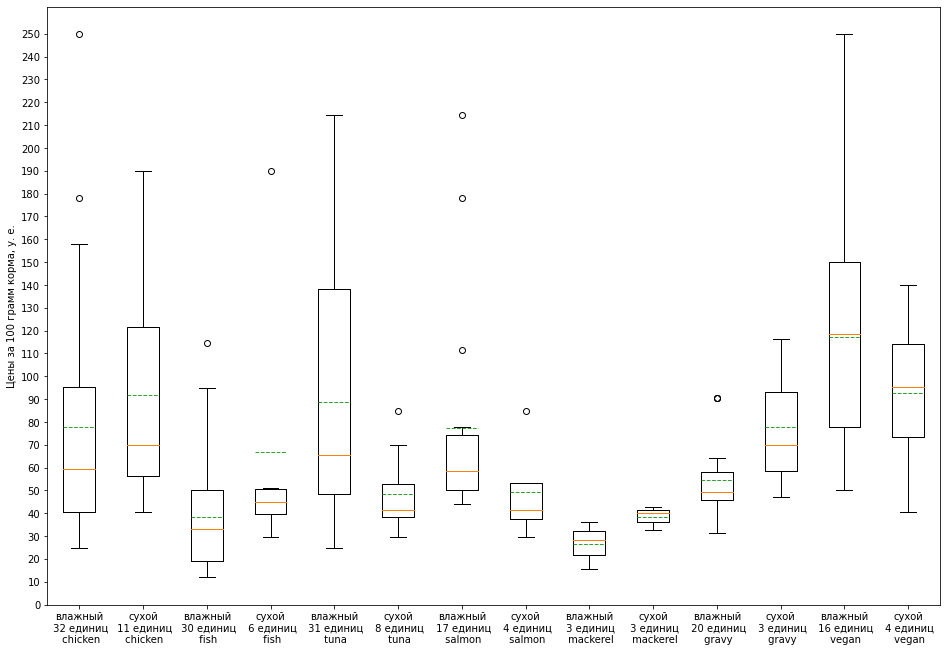

In [51]:
boxplot_ing_except_comp(data, "price_per_100g", "Цены за 100 грамм корма, у. е.", ["chicken", "fish", "tuna", "salmon", "mackerel", "gravy", "vegan"], "me-o")

В сравнении с общим графиком, видно, что незначительно повысились:
- средняя цена с ингредиентом chicken; верхний усик у ингредиента fish;
- третьи квартили у ингредиентов tuna и salmon.

Это связано с двумя моментами:
1. стоимости за 100 грамм у производителя Me-o в целом низкие — верхний усик находится на уровне 50 у. е., и среднее на уровне 35 у. е.;
2. у производителя Me-o представлено всего 19 кормов, что в 2.5 меньше, чем у Whiskas, потому Me-o без околонулевого показателя стоимости не сможет сильнее влиять на картину цен.

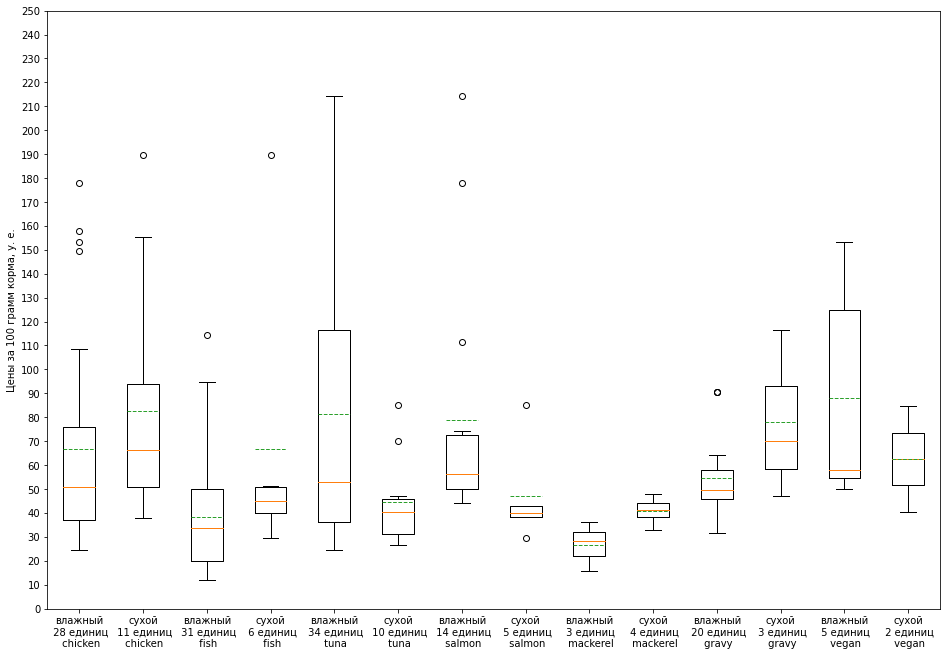

In [52]:
boxplot_ing_except_comp(data, "price_per_100g", "Цены за 100 грамм корма, у. е.", ["chicken", "fish", "tuna", "salmon", "mackerel", "gravy", "vegan"], "farmina")

В сравнении с общим графиком, видно, что: 
- у ингредиентов chicken и vegan снижаются статистики (у chicken верхний квартиль, у vegan все три квартиля), а также исчезают два выброса;
- у salmon снижается средняя цена.
Это обусловлено тем, что у производителя в целом высокие цены, даже присутствуют выбросы на общем графике.

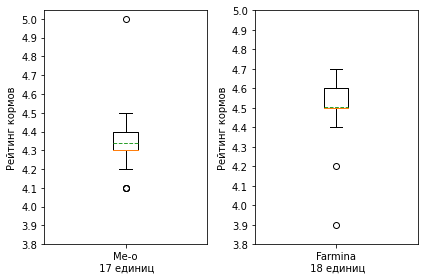

In [53]:
plt.figure(1)
plt.subplot(121)
plt.boxplot(data[data["company"] == 'me-o']['star_rating'].dropna(), meanline=True, showmeans=True)
plt.yticks([x/10 for x in range(38, 51, 1)])
plt.xticks([1], [f"Me-o\n {data[data['company']=='me-o'].dropna().shape[0]} единиц"])
plt.ylabel("Рейтинг кормов")
plt.subplot(122)
plt.boxplot(data[data["company"] == 'farmina']['star_rating'].dropna(), meanline=True, showmeans=True)
plt.xticks([1], [f"Farmina\n {data[data['company']=='farmina'].dropna().shape[0]} единиц"])
plt.yticks([x/10 for x in range(38, 51, 1)])
plt.ylabel("Рейтинг кормов")
plt.tight_layout()
plt.show()

Рейтинг кормов зеркально отличается у производителей, однако у Me-o только один выброс на уровне 5.0, в то время как у Farmina три выброса, находящихся ниже первого квартиля, из-за чего среднее значение значительно сдвинуто вниз. Проверим различия в группах на значимость по тестам.

In [54]:
print(scipy.stats.shapiro(data[data["company"] == 'me-o']['star_rating'].dropna()))
print(scipy.stats.shapiro(data[data["company"] == 'farmina']['star_rating'].dropna()))

ShapiroResult(statistic=0.790494441986084, pvalue=0.0003565543156582862)
ShapiroResult(statistic=0.7693488001823425, pvalue=0.0005784528329968452)


Как и было понятно ранее, у Farmina слишком много выбросов, в отличие от Me-o.

In [55]:
print(scipy.stats.mannwhitneyu(data[data["company"] == 'me-o']['star_rating'].dropna(), data[data["company"] == 'farmina']['star_rating'].dropna()))
print(scipy.stats.f_oneway(data[data["company"] == 'me-o']['star_rating'].dropna(), data[data["company"] == 'farmina']['star_rating'].dropna()))

MannwhitneyuResult(statistic=69.0, pvalue=0.0003877349216750037)
F_onewayResult(statistic=7.375964348334303, pvalue=0.009891872888487883)


Рейтинг значимо отличается у этих двух производителей, вероятно, из-за выбросов.

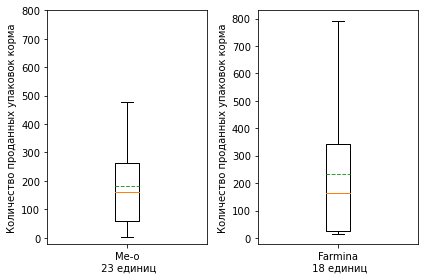

In [67]:
plt.figure(1)
plt.subplot(121)
plt.boxplot(data[data["company"] == 'me-o']['packages_sold'].dropna(), meanline=True, showmeans=True)
plt.xticks([1], [f"Me-o\n {data[data['company']=='me-o'].shape[0]} единиц"])
plt.yticks(range(0, 900, 100))
plt.ylabel("Количество проданных упаковок корма")
plt.subplot(122)
plt.boxplot(data[data["company"] == 'farmina']['packages_sold'].dropna(), meanline=True, showmeans=True)
plt.xticks([1], [f"Farmina\n {data[data['company']=='farmina'].shape[0]} единиц"])
plt.ylabel("Количество проданных упаковок корма")
plt.tight_layout()
plt.show()

Неожиданно продажи у Me-o ниже, несмотря на еще более низкие цены в среднем, чем у Whiskas, и на достаточно неплохой рейтинг кормов. Возможно, всё дело в выбросе в данных продаж Farmina. Проверим фильтрацией.

In [57]:
for x in [500, 600, 700]:
    print(f"Количество кормов Farmina с продажами выше {x} - {data[(data['company']=='farmina') & (data['packages_sold']>x)].shape[0]} единиц.")

Количество кормов Farmina с продажами выше 500 - 4 единиц.
Количество кормов Farmina с продажами выше 600 - 1 единиц.
Количество кормов Farmina с продажами выше 700 - 1 единиц.


По всей видимости, один из кормов Farmina пользуется популярностью благодаря качеству и/или бренду, в отличие от Me-o, или же были произведены крупные закупки у производителя Farmina, что привело к текущей картине.

Выводы по группе № 2:
- Me-o имеет более низкие стоимости кормов и более низкие продажи, чем Farmina;
- сравнивать доходность от продаж кормов у Me-o и Farmina бессмысленно, так как стоимость за 100 грамм у Me-o ниже, как и продажи кормов. Однако, будь у нас данные о себестоимости этих кормов, было бы интересно сравнить их прибыльность. С другой стороны, вполне очевидно, что Farmina имеет более широкую аудиторию потребителей, что позволяет Farmina получать дополнительный доход от неосновной деятельности, к примеру, от показа рекламы на сайте или упаковке;
- у Me-o более широкий выбор в плане различных ингредиентов, но при этом очень маленький выбор кормов с одинаковыми ингредиентами — 3 из 5 ингредиентов представлены только по одному корму.

#### Исследуем группу № 3